In [1]:
import math
import numpy as np
import statistics as st
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

In [2]:
x = 10
y = 5
x+y

15

In [3]:
math.log(x)

2.302585092994046

In [4]:
math.exp(y)

148.4131591025766

In [5]:
math.cos(x)

-0.8390715290764524

In [6]:
x == y

False

In [7]:
x > y

True

## 3.3.1 Vector

In [8]:
# Define numerical vector z
z = np.array([3,5,7,9])

# Define character vector zz, where numerical operations cannot be directly applied.
zz= np.array(["cup", "plate", "pen", "paper"])

In [9]:
#3.3.1.1 Average
st.mean(z)

6

In [10]:
#3.3.1.2 Standard Deviation
np.std(z)

2.23606797749979

In [11]:
#3.3.1.3 Median
np.median(z)

6.0

In [12]:
#3.3.1.4 Maximum
np.max(z)

9

In [13]:
#3.3.1.5 Minimum
np.min(z)

3

In [14]:
#3.3.1.6 Summary statistics
df_describe = pd.DataFrame(z)
df_describe.describe()

,0
count,4.000000
mean,6.000000
std,2.581989
min,3.000000
25%,4.500000
50%,6.000000
75%,7.500000
max,9.000000


In [15]:
#3.3.1.7 Calculations
print(z)

[3 5 7 9]


In [16]:
print(z+2)

[ 5  7  9 11]


In [17]:
print(z/10)

[0.3 0.5 0.7 0.9]


In [18]:
# define vector z1
z1 = np.array([2,4,6,8])
# Elementwise operations (must be the same length)
print(z+z1)

[ 5  9 13 17]


In [19]:
print(z*z1)

[ 6 20 42 72]


In [20]:
# define vector z2
z2 = np.concatenate((z, z1))
print(z2)

[3 5 7 9 2 4 6 8]


In [21]:
#3.3.1.8 Indexing
#How to extract the second entry of vector z2=(3,5,7,9,2,4,6,8)?
z2[1] 

5

In [22]:
#How to extract all elements greater than 3 from vector z2?
print(z2[z2>3])

[5 7 9 4 6 8]


In [23]:
#How to extract all elements greater than 3 and smaller than 6 from vector z2?
print(z2[(z2>3) & (z2<6)])

[5 4]


In [24]:
#How to order the vector z2 from smallest to largest?
print(np.sort(z2))

[2 3 4 5 6 7 8 9]


## 3.3.2 Matrix

In [25]:
#3.3.2.1 Creating
z = np.array([3,5,7,9])

A = np.reshape([1,2,3,4,5,6],(2,3))
print(A)

[[1 2 3]
 [4 5 6]]


#### Question: Think about what would it be if specify ncol=2, or ncol=4?

In [26]:
A42 = np.reshape(z2,(4,2))
A24 = np.reshape(z2,(2,4))
print(" The A42 matrix is :\n",A42)
print("The A24 matrix is:\n", A24)

 The A42 matrix is :
 [[3 5]
 [7 9]
 [2 4]
 [6 8]]
The A24 matrix is:
 [[3 5 7 9]
 [2 4 6 8]]


In [27]:
# 3.3.2.2 Calculation
A = np.reshape([1,2,3,4,5,6],(2,3))

A+2

array([[3, 4, 5],
       [6, 7, 8]])

In [28]:
A.shape

(2, 3)

In [29]:
print("The transpose of matrix is :\n", A.T)

The transpose of matrix is :
 [[1 4]
 [2 5]
 [3 6]]


In [30]:
np.matmul((A.T),A)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [31]:
# New matrix with dimension 4*2
A2 = A * 2
# Matrix calculation should satisfy the rules of matrix algebra
A + A2

array([[ 3,  6,  9],
       [12, 15, 18]])

#### Question: What would happen if run A %*% A2?

In [32]:
A*A2

array([[ 2,  8, 18],
       [32, 50, 72]])

#### 3.3.2.3 Indexing
How to extract the second entry of second row from matrix A?

In [33]:
A[1,1]

5

How to extract the first row from matrix A?

In [34]:
A[1, ]

array([4, 5, 6])

How to extract first two column from matrix A?

In [35]:
A[:,0:2]

array([[1, 2],
       [4, 5]])

What are the diagonal elements of t(A) %*% A?

The diagonal elements are 17,29,45

In [36]:
### 3.3.3 Data frames

In [37]:
# 3.3.3.1 Creating
mydf = pd.DataFrame(A)
type(mydf)

pandas.core.frame.DataFrame

In [38]:
mydata = pd.read_csv("storks.csv")

In [39]:
cars = pd.read_csv("cars.csv")

In [40]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [41]:
#Variable names
cars.columns

Index(['speed', 'dist'], dtype='object')

In [42]:
#Summary
cars.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [43]:
#Structure
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [44]:
## 3.3.3.2 Manipulating

In [45]:
cars1 =  cars
cars1['time'] =  cars['dist']/cars['speed']

In [46]:
cars2 = cars1.iloc[: , :-1]
cars2.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [47]:
# 3.3.4 List
mylist =  list([z, A, cars])

In [48]:
## Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = cars[['speed']]
y = cars[['dist']]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =14023799)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 1) (10, 1) (40, 1) (10, 1)


In [49]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.coef_)

[[3.89815818]]


## 3.4 Basic Plotting

In [50]:
dataset = load_boston()
boston_housing = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston_housing['target'] = dataset.target

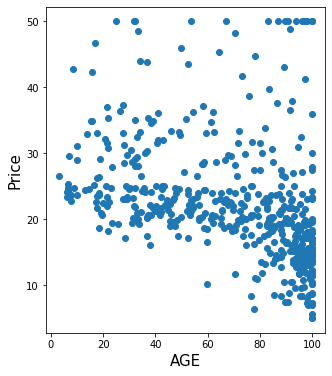

In [57]:
plt.figure(figsize=(5, 6))
plt.scatter(boston_housing.AGE,boston_housing.target)
plt.ylabel('Price', size=15)
plt.xlabel('AGE', size=15);

## 3.5 Probability Distributions

In [52]:
result1 =binom.pmf(k=4,n=10,p=0.5)
print(result1)

0.20507812500000022


In [53]:
norm_cdf = norm.cdf(1.86)
print(norm_cdf)

0.9685572370192473


In [54]:
norm_ppf = norm.ppf(0.975)
print(norm_ppf)

1.959963984540054


In [55]:
norm.rvs(size=10,random_state=14023799)

array([ 1.12009202, -1.28851116, -0.57756705,  0.01251539,  2.31334531,
       -1.0603478 ,  0.58773575, -0.37842919, -1.76654778,  0.68061982])

In [56]:
norm.rvs(100,20,size=10,random_state=14023799)

array([122.40184039,  74.22977676,  88.44865893, 100.25030773,
       146.26690616,  78.79304393, 111.75471509,  92.43141628,
        64.66904448, 113.61239647])